## Digit Recognizer from NumPy only (Standard Neural Network)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T  # Dev set 
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T # Training Set 
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
Y_train

array([7, 8, 3, ..., 6, 4, 8], dtype=int64)

  This ANN will have a simple two-layer architecture,
  will have 784 units corresponding to the 784 pixels in each 28x28 input image,
  will have 10 units with ReLU activation,
  will have 10 units corresponding to the ten digit classes with softmax activation.

### Forward prop , Backword Prop & Parameter Updates

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 9 2 ... 2 1 9] [7 8 3 ... 6 4 8]
0.12329268292682927
Iteration:  10
[1 6 2 ... 5 8 2] [7 8 3 ... 6 4 8]
0.19275609756097561
Iteration:  20
[1 6 0 ... 5 0 2] [7 8 3 ... 6 4 8]
0.3038048780487805
Iteration:  30
[1 6 0 ... 6 0 2] [7 8 3 ... 6 4 8]
0.3521219512195122
Iteration:  40
[1 5 0 ... 6 0 2] [7 8 3 ... 6 4 8]
0.3948048780487805
Iteration:  50
[1 5 0 ... 7 1 7] [7 8 3 ... 6 4 8]
0.43629268292682927
Iteration:  60
[1 5 3 ... 7 1 7] [7 8 3 ... 6 4 8]
0.47080487804878046
Iteration:  70
[7 5 3 ... 7 1 7] [7 8 3 ... 6 4 8]
0.5048536585365854
Iteration:  80
[7 5 3 ... 7 1 5] [7 8 3 ... 6 4 8]
0.535219512195122
Iteration:  90
[7 5 3 ... 7 1 5] [7 8 3 ... 6 4 8]
0.561439024390244
Iteration:  100
[7 5 3 ... 7 1 5] [7 8 3 ... 6 4 8]
0.5841463414634146
Iteration:  110
[7 5 3 ... 7 1 5] [7 8 3 ... 6 4 8]
0.6042195121951219
Iteration:  120
[7 5 3 ... 7 8 5] [7 8 3 ... 6 4 8]
0.6237560975609756
Iteration:  130
[7 5 3 ... 3 8 5] [7 8 3 ... 6 4 8]
0.6409512195121951
Iteration:  140

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Check on Examples 

Prediction:  [7]
Label:  7


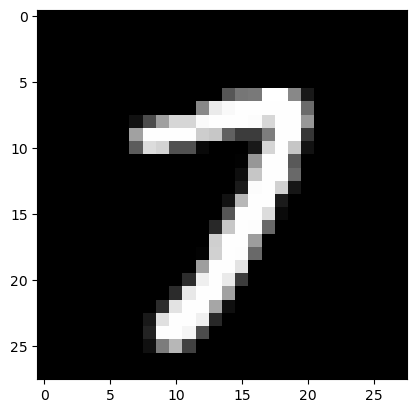

Prediction:  [3]
Label:  8


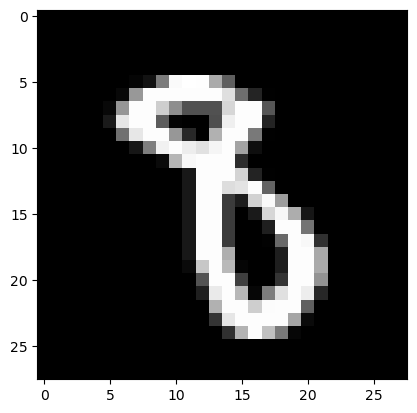

Prediction:  [3]
Label:  3


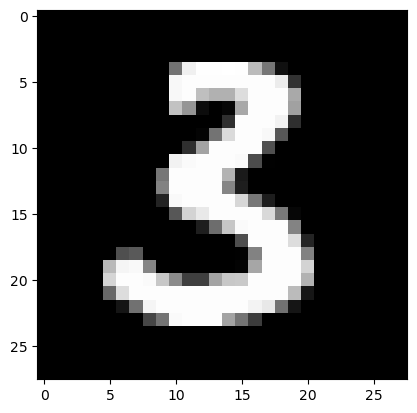

Prediction:  [7]
Label:  7


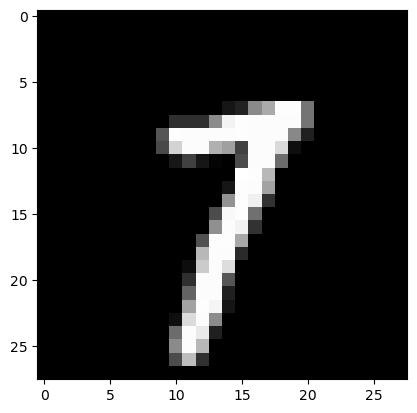

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

# Accuracy on the dev set:

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 0 3 3 0 3 1 9 9 2 2 4 0 7 3 8 9 2 1 6 0 6 6 3 7 9 3 6 7 7 9 4 1 1 6 2 5
 7 3 1 1 8 8 6 2 2 8 6 5 1 8 1 7 7 6 2 7 8 3 0 0 6 1 9 0 9 2 9 1 2 8 2 8 9
 7 4 8 7 0 9 3 3 5 8 4 8 4 5 4 7 0 1 7 0 8 8 9 0 4 6 4 6 9 5 4 8 8 3 3 2 9
 9 6 5 5 6 0 3 6 6 6 9 6 8 4 2 1 7 0 2 3 9 2 9 0 4 7 8 4 5 1 4 9 9 7 7 8 9
 1 2 1 9 1 5 0 0 2 8 5 1 4 6 8 9 6 4 3 9 1 0 7 3 6 7 0 0 2 7 3 3 9 3 0 5 3
 9 7 7 4 5 1 7 6 9 3 5 6 1 7 7 5 6 7 2 1 4 8 1 6 8 2 8 1 3 4 3 6 7 6 4 2 1
 6 1 9 9 9 8 7 3 2 4 1 6 3 7 4 5 8 8 8 2 6 3 8 8 7 2 7 6 1 0 9 9 6 1 2 9 2
 4 1 4 4 5 3 2 1 5 8 9 3 1 9 1 3 6 4 6 3 8 2 7 9 8 7 1 0 6 7 1 1 2 9 1 1 0
 8 1 7 4 9 8 4 8 9 7 9 3 8 8 0 6 2 0 9 1 2 3 6 4 0 5 2 2 7 0 4 9 9 9 1 8 9
 1 7 0 9 5 8 2 4 2 8 6 9 5 2 1 0 4 8 5 5 6 1 4 8 2 2 0 3 9 0 0 1 3 3 5 2 6
 4 9 2 6 1 1 2 5 1 7 1 9 4 6 8 8 0 5 3 4 2 5 1 1 9 9 8 4 6 4 4 8 3 5 2 8 3
 0 2 6 7 1 7 7 6 8 8 7 1 0 0 9 5 6 4 4 1 5 9 3 3 8 4 7 7 5 9 4 7 7 8 3 1 8
 7 0 2 9 0 5 4 9 4 3 2 5 8 0 0 1 9 3 0 1 3 3 7 1 7 2 8 8 3 0 7 8 4 5 7 6 1
 3 8 1 6 1 5 7 0 6 5 9 8 

0.839

#### Adding more layers and trying other gradient descent techniques can improve this neural network